In [41]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from minisom import MiniSom
import matplotlib.pyplot as plt

In [23]:
file_path = r"D:\Coding_Dev\College\SEM_6\NN\assets\banknote+authentication\data_banknote_authentication.txt"
data = pd.read_csv(file_path, sep=',')
df = pd.DataFrame(data)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "ClassLabel"]
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df

,Feature1,Feature2,Feature3,Feature4,ClassLabel
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [45]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_normalized = preprocessing.normalize(x)
normalized_df = pd.DataFrame(x_normalized, columns=x.columns)
normalized_df['ClassLabel'] = y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
normalized_df

,Feature1,Feature2,Feature3,Feature4,ClassLabel
0,0.369056,0.883110,-0.286075,-0.045550,0
1,0.465045,0.835525,-0.251515,-0.149573,0
2,0.763780,-0.521232,0.380152,0.021031,0
3,0.301268,0.829982,-0.349606,-0.313278,0
4,0.050902,-0.688796,0.706823,-0.152873,0
...,...,...,...,...,...
1367,0.193595,0.643125,-0.691221,-0.266693,1
1368,-0.168665,-0.592375,0.786715,0.041512,1
1369,-0.165672,-0.594541,0.777189,-0.122680,1
1370,-0.230903,-0.543141,0.802981,-0.083084,1


In [38]:
X_train_normalized = preprocessing.normalize(x_train)
X_test_normalized = preprocessing.normalize(x_test)

array([[-0.23974114,  0.59744554, -0.6007333 , -0.47402797],
       [ 0.06824791,  0.48418153, -0.64928304, -0.58253068],
       [ 0.12230918,  0.96085963, -0.16079776, -0.18956086],
       ...,
       [-0.56244759,  0.74283464,  0.01326425, -0.36286838],
       [-0.7683717 ,  0.59731157,  0.03589287, -0.22701437],
       [-0.24052013, -0.51857006,  0.81948881, -0.04090533]])

In [50]:
grid_rows = 2
grid_columns = 2
input_len = X_train_normalized.shape[1]

som = MiniSom(grid_rows, grid_columns, input_len, sigma=1.0, learning_rate=0.35, random_seed=42)
som.random_weights_init(X_train_normalized)
num_epochs = 1000
som.train_random(X_train_normalized, num_epochs)

bmu_indices = np.array([som.winner(x) for x in X_test_normalized])

print(bmu_indices[5])


[1 0]


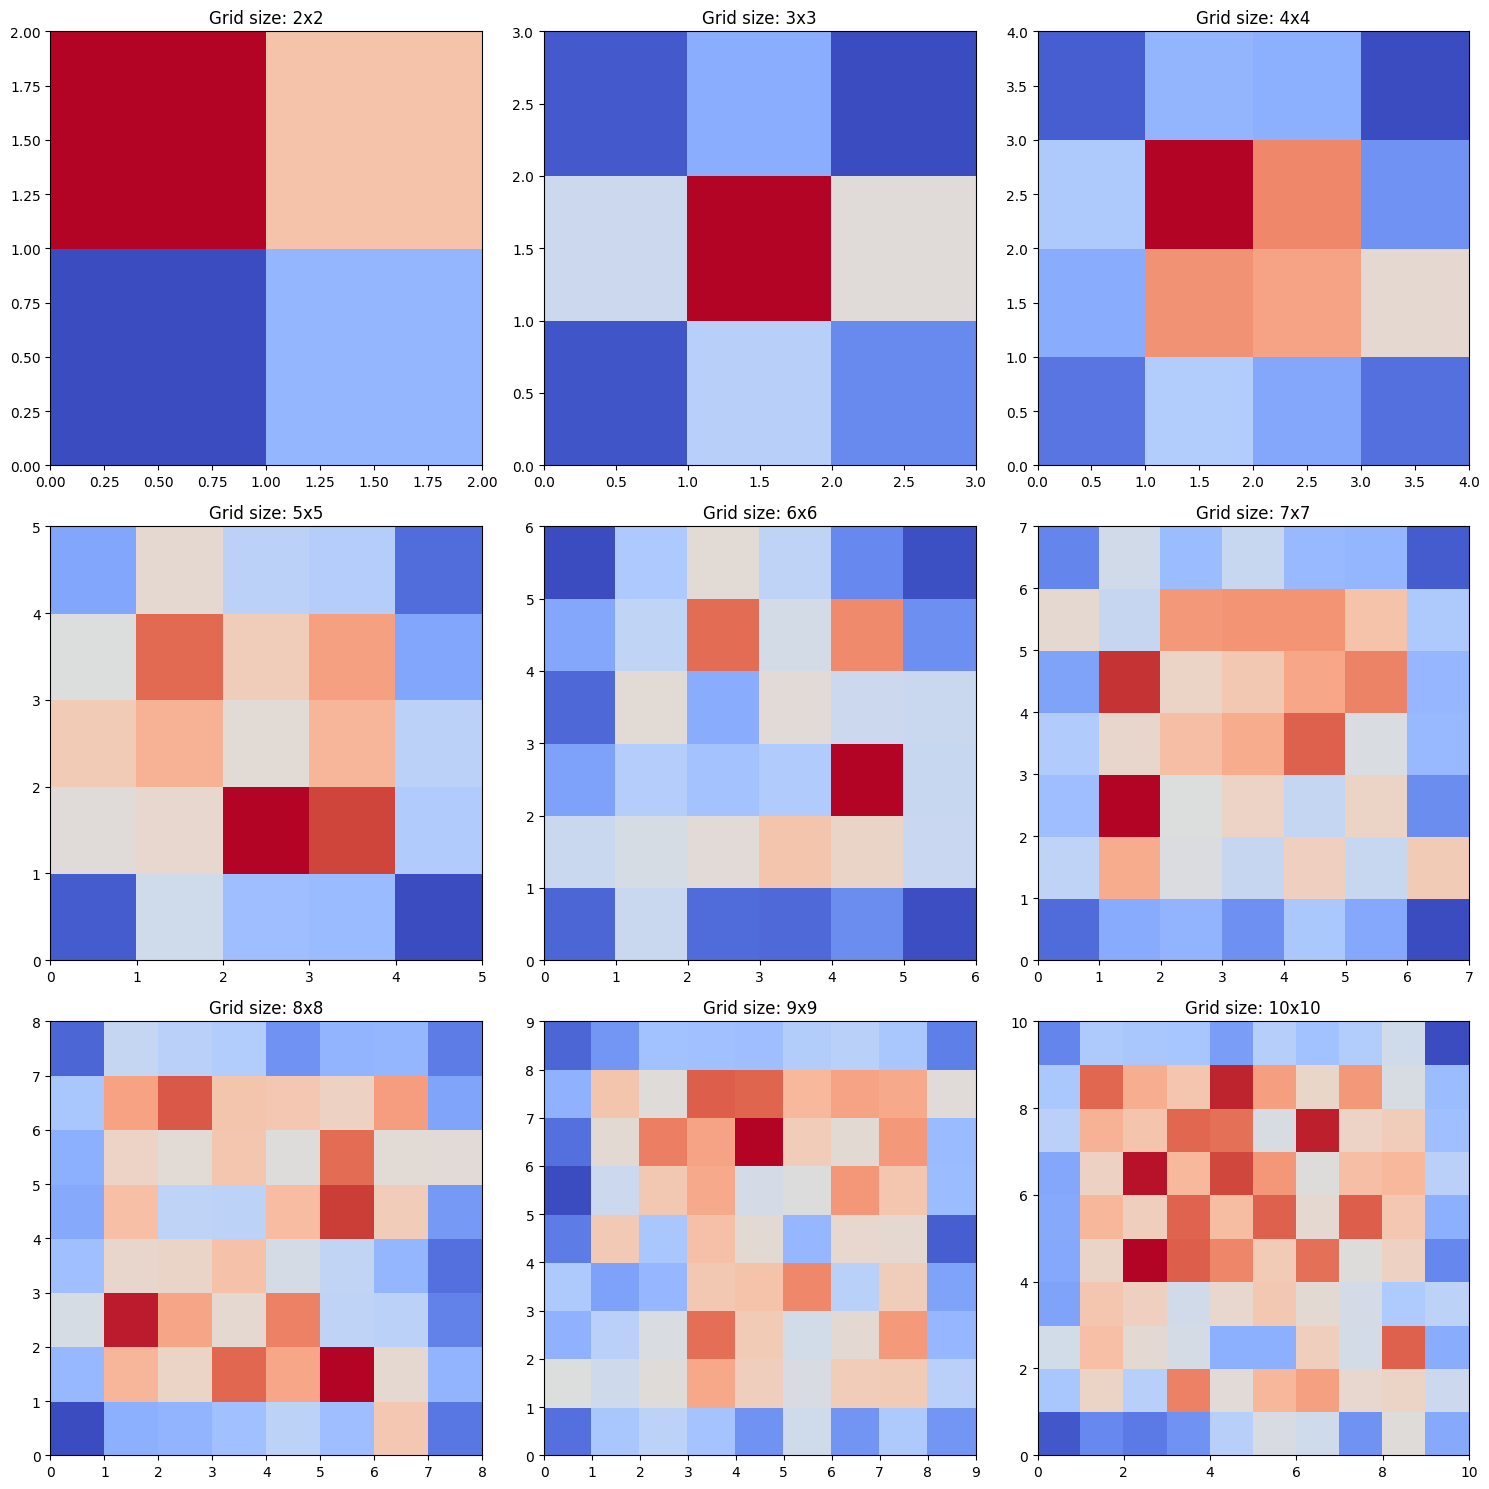

In [74]:
grid_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10]

num_cols = 3
num_rows = (len(grid_sizes) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for idx, grid_size in enumerate(grid_sizes):
    row = idx // num_cols
    col = idx % num_cols

    som = MiniSom(grid_size, grid_size, X_train_normalized.shape[1], sigma=0.5, learning_rate=0.5, random_seed=42)
    som.random_weights_init(X_train_normalized)
    num_epochs = 1000
    som.train_random(X_train_normalized, num_epochs)

    ax = axes[row, col]
    ax.pcolor(som.distance_map().T, cmap='coolwarm')

    markers = ['o', 's', 'D']
    colors = ['r', 'g', 'b']
    for i, (x, t) in enumerate(zip(X_train_normalized, y_train)):
        w = som.winner(x)
        # ax.plot(w[0] + 0.5, w[1] + 0.5, markers[t], markerfacecolor='None', markeredgecolor=colors[t], markersize=12, markeredgewidth=2)
        ax.plot(w[0] + 0.5, w[1] + 0.5)
    ax.set_title(f'Grid size: {grid_size}x{grid_size}')
    
plt.tight_layout()
# plt.title(f'SOM Visualization (Grid Size: {grid_size}x{grid_size})')
plt.show()